<a href="https://colab.research.google.com/github/spdkh/Machine-Learning/blob/master/ML_Project__Parisa_Daj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project

## Import Libraries

In [202]:
import glob
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
import gensim

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/data/Machine_Learning/'


In [ ]:

data = dict()
words_counter = dict()
data_word2vec = dict()
for i, file in enumerate(glob.glob(data_dir + '*.txt')):
    type_ = file.split('/')[-1].replace('.txt', '')
    with open(file) as f:
        data[type_] = f.readlines()
    # words_counter[type_] = collections.Counter([word for sentence in data[type_] for word in sentence.split()])
    data_word2vec[type_] = Word2Vec(data[type_],
                 window=5, min_count=1, workers=4)
print('Dataset Loaded')
print(data.keys())
# print(words_counter)


Dataset Loaded
dict_keys(['test', 'trainlabels', 'testlabels', 'validation', 'validationlabels', 'train'])


In [172]:
data['train'][0:5]

[TaggedDocument(words=['we', 'stayed', 'at', 'the', 'schicago', 'hilton', 'for', 'days', 'and', 'nights', 'for', 'conference', 'have', 'to', 'say', 'normally', 'am', 'very', 'easy', 'going', 'about', 'amenities', 'cleanliness', 'and', 'the', 'like', 'however', 'our', 'experience', 'at', 'the', 'hilton', 'was', 'so', 'awful', 'am', 'taking', 'the', 'time', 'to', 'actually', 'write', 'this', 'review', 'truly', 'do', 'not', 'stay', 'at', 'this', 'hotel', 'when', 'we', 'arrived', 'in', 'our', 'room', 'it', 'was', 'clear', 'that', 'the', 'carpet', 'hadn', 'been', 'vacuumed', 'figuered', 'okay', 'it', 'just', 'the', 'carpet', 'until', 'saw', 'the', 'bathroom', 'although', 'the', 'bathroom', 'had', 'all', 'the', 'superficial', 'indicators', 'of', 'housekeeping', 'having', 'recently', 'cleaned', 'paper', 'band', 'across', 'the', 'toilet', 'paper', 'caps', 'on', 'the', 'drinking', 'glasses', 'etc', 'it', 'was', 'clear', 'that', 'no', 'actual', 'cleaning', 'took', 'place', 'there', 'was', 'spot'

In [ ]:
for sample_i in range(2):
    print('Test Line {}:  {}'.format(sample_i + 1, data['test'][sample_i]))
    print('Test Label {}:  {}'.format(sample_i + 1, data['testlabels'][sample_i]))
    
    print('Train Line {}:  {}'.format(sample_i + 1, data['train'][sample_i]))
    print('Train Label {}:  {}'.format(sample_i + 1, data['trainlabels'][sample_i]))
print(np.shape(data['train']))
print(np.shape(data['validation']))
print(np.shape(data['test']))

Test Line 1:  A recent stay at the James Hotel-Chicago, revealed the the recent updating at this hotel was a facelift only. Although the rooms and public areas look nice, the hotel still needs serious work. Our first room was not clean when we arrived and this non-smoking room had a serious odor of cigarette smoke. We asked for a new room which was clean and odor free. We had to involve the Manager before our request was granted. The new room was better at first glance, but was severely lacking. We could not get the temperature properly regulated. The room was always either too hot or too cold for our two night stay. In a hotel commanding the rates of the James, we expect the room temperature to be a comfort which is taken for granted, not something which is a constant battle. Our mattress was horribly uncomfortable. When the rooms were updated, the James skipped new mattresses. Ours was worn to the point of having indentations you can't get out of--when you lie down, you sort of sink 

In [ ]:
data_word2vec['train'][data['train'][10][10]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.07001857,  0.06334195, -0.047704  , -0.02834628,  0.22741158,
        0.38218677, -0.23228121,  0.25482547,  0.3270088 , -0.06648161,
        0.14152896, -0.05429206, -0.0302817 , -0.06182584,  0.27059448,
        0.07733041,  0.2718061 ,  0.06274204,  0.0560449 ,  0.38012323,
       -0.2934552 , -0.11088447,  0.02600452, -0.24957143, -0.30823678,
       -0.2572764 , -0.01021157,  0.0257428 ,  0.02062578, -0.15266715,
        0.04126903, -0.30923378, -0.3536046 , -0.11325978,  0.04909535,
       -0.04070758, -0.24135527, -0.01053654,  0.09837872,  0.06689546,
       -0.10657115, -0.35553476, -0.00827671, -0.02830714,  0.24863341,
       -0.01179694, -0.4386969 ,  0.2743556 ,  0.282551  , -0.40959713,
        0.4048206 , -0.32458997, -0.06840073,  0.13569383,  0.03801304,
       -0.24331643,  0.02856317, -0.07448559,  0.5575828 ,  0.4670614 ,
        0.18737015,  0.01975152,  0.09284528,  0.46198687, -0.01155018,
       -0.09363211,  0.00335689, -0.03775613, -0.05846178, -0.35

In [117]:
import smart_open


def read_data(fname):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        tokens_only = True if 'test' in fname else False
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            # assume there's one document per line, tokens separated by whitespace

            if 'label' in fname:
                yield int(line.replace('\n', ''))
            else:
                if tokens_only:
                    yield tokens
                else:
                    # For training data, add tags
                    yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

data = dict()
for i, file in enumerate(glob.glob(data_dir + '*.txt')):
    # print(file)
    type_ = file.split('/')[-1].replace('.txt', '')
    data[type_] = list(read_data(file))


In [118]:
print(data['testlabels'][10])


1


In [119]:
print(data['test'])

[['recent', 'stay', 'at', 'the', 'james', 'hotel', 'chicago', 'revealed', 'the', 'the', 'recent', 'updating', 'at', 'this', 'hotel', 'was', 'facelift', 'only', 'although', 'the', 'rooms', 'and', 'public', 'areas', 'look', 'nice', 'the', 'hotel', 'still', 'needs', 'serious', 'work', 'our', 'first', 'room', 'was', 'not', 'clean', 'when', 'we', 'arrived', 'and', 'this', 'non', 'smoking', 'room', 'had', 'serious', 'odor', 'of', 'cigarette', 'smoke', 'we', 'asked', 'for', 'new', 'room', 'which', 'was', 'clean', 'and', 'odor', 'free', 'we', 'had', 'to', 'involve', 'the', 'manager', 'before', 'our', 'request', 'was', 'granted', 'the', 'new', 'room', 'was', 'better', 'at', 'first', 'glance', 'but', 'was', 'severely', 'lacking', 'we', 'could', 'not', 'get', 'the', 'temperature', 'properly', 'regulated', 'the', 'room', 'was', 'always', 'either', 'too', 'hot', 'or', 'too', 'cold', 'for', 'our', 'two', 'night', 'stay', 'in', 'hotel', 'commanding', 'the', 'rates', 'of', 'the', 'james', 'we', 'expec

In [120]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [121]:
model.build_vocab(data['train'])

In [ ]:
print(f"Word 'penalty' appeared {model.wv.get_vecattr('penalty', 'count')} times in the training corpus.")

In [122]:
model.train(data['train'], total_examples=model.corpus_count, epochs=model.epochs)

In [123]:
vector = model.infer_vector(data['train'][10].words)
print(vector)

[-1.035316   -1.0405992  -1.1092484  -1.2254205  -1.1571485  -1.9696178
  0.9427829  -2.7661366  -0.9324076   0.7303056   0.25891444  1.0261468
 -1.0504324  -0.74460423  0.757469    1.1572694   0.32013807 -0.70779645
  1.151543   -0.21925066  2.0692623   0.01745343  0.9193442   1.5483404
  0.51902145  1.0293924  -0.5432368   2.1299117   1.1254209  -0.5492275
  1.2784573  -0.6750889  -1.2226354   0.95399433 -0.12863952  0.02625748
 -2.36749     0.5033565   0.5745588  -1.3806996   0.21684456 -0.4555223
 -0.02592901  0.3394687   1.8008486   0.04588306  1.5311618   1.3785455
  1.4251657   0.6009968 ]


In [194]:
x = dict(filter(lambda elem: 'label' not in elem[0], data.items()))
len(x['validation'])

118

In [196]:
n_reviews = len(data['train'])

x_train = np.vstack([model.infer_vector(data['train'][id].words) for id in range(n_reviews)])
x_test = np.vstack([model.infer_vector(data['train'][id].words) for id in range(len(data['test']))])
x_val = np.vstack([model.infer_vector(data['train'][id].words) for id in range(len(data['validation']))])

y_train = data['trainlabels'][:n_reviews]
y_test = data['testlabels'][:]
y_val = data['validationlabels'][:]

print('\nTraining Data Samples')
print(x_train[::n_reviews//3])
print(y_train[::n_reviews//3])

print('\nTest Data Samples')
print(x_test[:3])
print(y_test[:3])

print('\nValidation Data Samples')
print(x_val[:3])
print(y_val[:3])


Training Data Samples
[[-0.4650935  -1.3979051   1.264147   -0.32016942  0.27072778  0.41960847
   1.7967166  -0.02418386 -2.261239   -0.03230198  0.20459886  0.99433523
  -1.5993104  -1.6366069  -1.0480213   1.0284101  -0.4853748   1.5109359
   0.02567046 -0.71832937 -0.95436305 -1.9348683  -1.4030262   3.0184324
   0.613933   -2.0041535   0.45613238  0.6286191  -0.37891474 -1.6341987
  -0.9369016  -0.08140428  0.18902354  1.602083    0.65582216  1.0602386
  -1.9066612   0.19260252  1.2351738   0.30782956  0.47990322  0.82399845
   1.2240164  -0.68160075 -0.90840244  0.76755536  0.9483962  -2.0512156
   0.46066597 -0.46383363]
 [ 0.38875952 -1.7221432   0.66029304  0.5778981  -0.8729372  -0.2742725
   0.66129684  0.29727763 -0.64170384 -0.49850026  0.26474038 -0.38342854
  -1.3015178  -0.9005937  -0.54143256  0.15763998 -0.6695332   0.78961986
  -0.25772163 -0.3406113  -0.7158725   0.13067925  1.2087939   1.4215951
   0.44338018 -0.25831303 -0.07113617  0.14080507  0.8658726   0.0726

In [170]:
n_tag1 = len(np.nonzero(y_train)[0])
n_tag0 = len(y_train) - len(np.nonzero(y_train)[0])
print(n_tag0, n_tag1)
len(np.nonzero(y_train)[0])

450 500


500

In [264]:
def classify(clf,
             X_train=x_train, y_train=y_train,
             X_test=x_val, y_test=y_val):
    clf.fit(X_train, y_train)
    
    y_prob = clf.predict(X_test)

    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=2)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp.plot()
    plt.show()
    return f1_score(y_test, y_prob)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


solver: saga , penalty: none , l1 ratio: None , f1 score 0.6405228758169935
solver: saga , penalty: l1 , l1 ratio: None , f1 score 0.6493506493506493


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


solver: saga , penalty: l2 , l1 ratio: None , f1 score 0.6405228758169935
solver: saga , penalty: elasticnet , l1 ratio: 0.5 , f1 score 0.6493506493506493
solver: lbfgs , penalty: none , l1 ratio: None , f1 score 0.6405228758169935
solver: lbfgs , penalty: l2 , l1 ratio: None , f1 score 0.6405228758169935
solver: newton-cg , penalty: none , l1 ratio: None , f1 score 0.6405228758169935
solver: newton-cg , penalty: l2 , l1 ratio: None , f1 score 0.6405228758169935


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver: liblinear , penalty: l1 , l1 ratio: None , f1 score 0.6493506493506493
solver: liblinear , penalty: l2 , l1 ratio: None , f1 score 0.6405228758169935


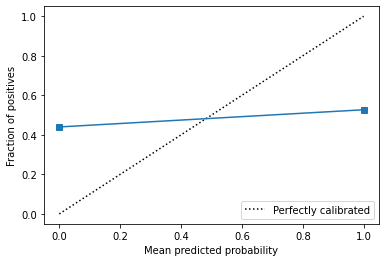

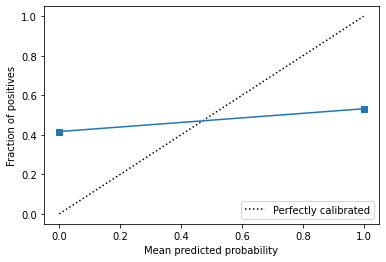

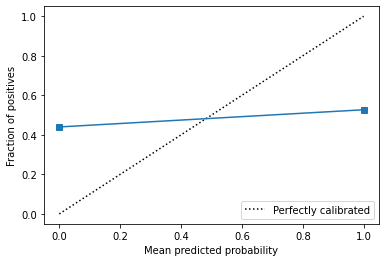

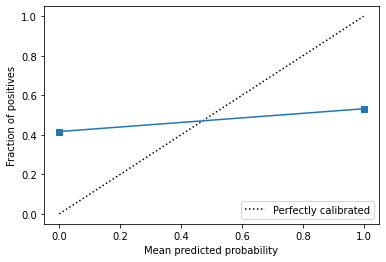

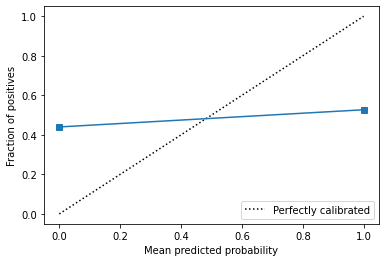

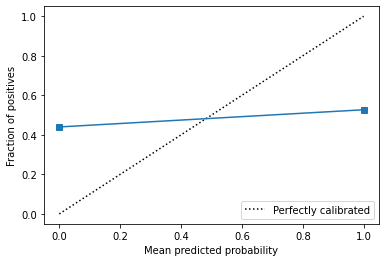

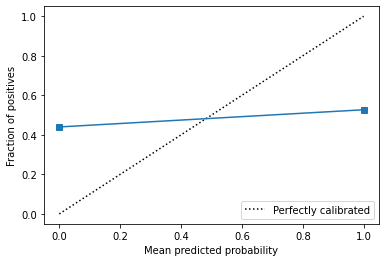

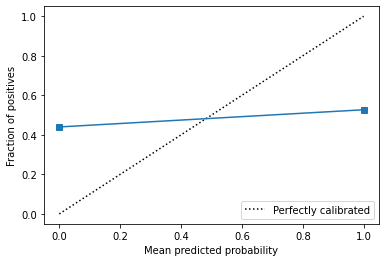

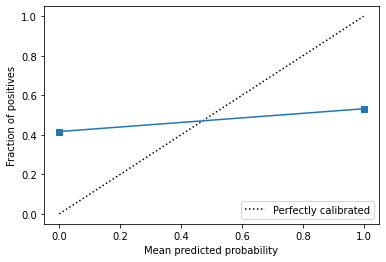

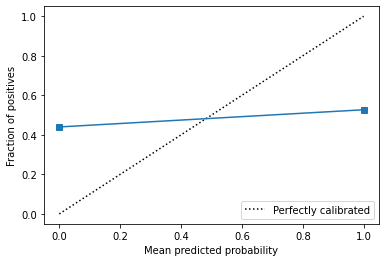

In [274]:
normalizations = {'saga':{'none': None, 'l1': None, 'l2': None, 'elasticnet': 0.5},
                  'lbfgs': {'none': None, 'l2': None},
                  'newton-cg': {'none': None, 'l2': None},
                  'liblinear': {'l1': None, 'l2': None}}

log_reg = dict()
lr_f1s = dict()
for solver, other_norms in normalizations.items():
    for pen, l1_ratio in other_norms.items():
        # if we needed multiple penalties with different l1 ratios 
        penalty = pen.split('_')[0] 
        key = solver + '_' + pen
        log_reg[key] = LogisticRegression(penalty=penalty,
                                    solver=solver,
                                    l1_ratio=l1_ratio)
        lr_f1s[key] = classify(log_reg[key])
        print('solver:', solver,
            ', penalty:', pen,
            ', l1 ratio:', l1_ratio,
            ', f1 score:', lr_f1s[key])

maximum f1 score: 0.65


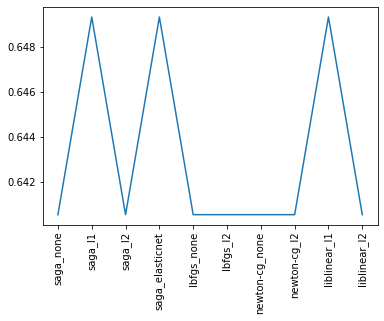

In [275]:
plt.plot(list(lr_f1s.values()))
plt.xticks(range(len(lr_f1s.keys())), list(lr_f1s.keys()), rotation='vertical')
print('maximum f1 score:', round(max(lr_f1s.values()), 3))

In [ ]:
activations = ['identity', 'logistic', 'tanh', 'relu']
lrs = ['constant', 'invscaling', 'adaptive']
optimizations = ['lbfgs', 'sgd', 'adam']
alphas = [5 ** (-2 * i) for i in range(1, 4)]
hidden_layer_sizes=[list(map(lambda n: 2 ** n, range(i))) for i in range(10)]

nn = dict()
nn_f1s = dict()
for hidden_layer_size in hidden_layer_sizes:
    for alpha in alphas:
        for lr in lrs:
            for activation in activations:
                for optimization in optimizations:
                    print(hidden_layer_size)
                    print(sum(hidden_layer_size))
                    key = activation + str(sum(hidden_layer_size)) + optimization + str(alpha) + lr
                    print(key)
                    nn[key] = MLPClassifier(hidden_layer_sizes=hidden_layer_size,
                                            activation=activation,
                                            solver=optimization,
                                            learning_rate = lr,
                                            alpha=alpha,
                                            max_iter=500,
                                            early_stopping=True)
                    nn_f1s[key] = classify(nn[key])
                    print('activation:', activation,
                        ', hidden_layer_size:', hidden_layer_size,
                        ', f1 score:', nn_f1s[key])

[]
0
identity0lbfgs0.04constant
activation: identity , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
identity0sgd0.04constant
activation: identity , hidden_layer_size: [] , f1 score 0.5652173913043479
[]
0
identity0adam0.04constant
activation: identity , hidden_layer_size: [] , f1 score 0.5616438356164384
[]
0
logistic0lbfgs0.04constant
activation: logistic , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
logistic0sgd0.04constant
activation: logistic , hidden_layer_size: [] , f1 score 0.5945945945945945
[]
0
logistic0adam0.04constant
activation: logistic , hidden_layer_size: [] , f1 score 0.6751592356687899
[]
0
tanh0lbfgs0.04constant
activation: tanh , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
tanh0sgd0.04constant
activation: tanh , hidden_layer_size: [] , f1 score 0.5611510791366907
[]
0
tanh0adam0.04constant
activation: tanh , hidden_layer_size: [] , f1 score 0.4301075268817204
[]
0
relu0lbfgs0.04constant
activation: relu , hidden_layer_size: [] ,

/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [] , f1 score 0.6013986013986015
[]
0
relu0lbfgs0.04invscaling
activation: relu , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
relu0sgd0.04invscaling
activation: relu , hidden_layer_size: [] , f1 score 0.6233766233766233
[]
0
relu0adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [] , f1 score 0.5571428571428572
[]
0
identity0lbfgs0.04adaptive
activation: identity , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
identity0sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [] , f1 score 0.5
[]
0
identity0adam0.04adaptive
activation: identity , hidden_layer_size: [] , f1 score 0.6099290780141844
[]
0
logistic0lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
logistic0sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.611111111111111
[]
0
logistic0adam0.04adaptive
activation: logistic , hidden_layer_size: [] , f1 score 0.6174496644295303
[]
0
tanh0lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
tanh0sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [] , f1 score 0.6142857142857143
[]
0
tanh0adam0.04adaptive
activation: tanh , hidden_layer_size: [] , f1 score 0.6043165467625898
[]
0
relu0lbfgs0.04adaptive
activation: relu , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
relu0sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [] , f1 score 0.5511811023622046
[]
0
relu0adam0.04adaptive
activation: relu , hidden_layer_size: [] , f1 score 0.462962962962963
[]
0
identity0lbfgs0.0016constant
activation: identity , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
identity0sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [] , f1 score 0.6206896551724139
[]
0
identity0adam0.0016constant
activation: identity , hidden_layer_size: [] , f1 score 0.5037037037037037
[]
0
logistic0lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
logistic0sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.6081081081081082
[]
0
logistic0adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [] , f1 score 0.6666666666666667
[]
0
tanh0lbfgs0.0016constant
activation: tanh , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
tanh0sgd0.0016constant
activation: tanh , hidden_layer_size: [] , f1 score 0.6068965517241379
[]
0
tanh0adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.6231884057971016
[]
0
relu0lbfgs0.0016constant
activation: relu , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
relu0sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [] , f1 score 0.6056338028169014
[]
0
relu0adam0.0016constant
activation: relu , hidden_layer_size: [] , f1 score 0.6573426573426574
[]
0
identity0lbfgs0.0016invscaling
activation: identity , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
identity0sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [] , f1 score 0.46774193548387094
[]
0
identity0adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [] , f1 score 0.6040268456375838
[]
0
logistic0lbfgs0.0016invscaling
activation: logistic , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
logistic0sgd0.0016invscaling
activation: logistic , hidden_layer_size: [] , f1 score 0.08823529411764708
[]
0
logistic0adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [] , f1 score 0.6122448979591838
[]
0
tanh0lbfgs0.0016invscaling
activation: tanh , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
tanh0sgd0.0016invscaling
activation: tanh , hidden_layer_size: [] , f1 score 0.2888888888888889
[]
0
tanh0adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [] , f1 score 0.6787878787878787
[]
0
relu0lbfgs0.0016invscaling
activation: relu , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
relu0sgd0.0016invscaling
activation: relu , hidden_layer_size: [] , f1 score 0.4715447154471545
[]
0
relu0adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [] , f1 score 0.6164383561643836
[]
0
identity0lbfgs0.0016adaptive
activation: identity , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
identity0sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [] , f1 score 0.5733333333333334
[]
0
identity0adam0.0016adaptive
activation: identity , hidden_layer_size: [] , f1 score 0.6176470588235295
[]
0
logistic0lbfgs0.0016adaptive
activation: logistic , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
logistic0sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.6176470588235295
[]
0
logistic0adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.6535947712418301
[]
0
tanh0lbfgs0.0016adaptive
activation: tanh , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
tanh0sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.605263157894737
[]
0
tanh0adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.6133333333333334
[]
0
relu0lbfgs0.0016adaptive
activation: relu , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
relu0sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [] , f1 score 0.6357615894039735
[]
0
relu0adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [] , f1 score 0.6266666666666667
[]
0
identity0lbfgs6.4e-05constant
activation: identity , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
identity0sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [] , f1 score 0.5416666666666667
[]
0
identity0adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [] , f1 score 0.5467625899280576
[]
0
logistic0lbfgs6.4e-05constant
activation: logistic , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
logistic0sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.6578947368421053
[]
0
logistic0adam6.4e-05constant
activation: logistic , hidden_layer_size: [] , f1 score 0.611111111111111
[]
0
tanh0lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
tanh0sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.5652173913043479
[]
0
tanh0adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.605263157894737
[]
0
relu0lbfgs6.4e-05constant
activation: relu , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
relu0sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [] , f1 score 0.5547445255474452
[]
0
relu0adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [] , f1 score 0.6068965517241379
[]
0
identity0lbfgs6.4e-05invscaling
activation: identity , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
identity0sgd6.4e-05invscaling
activation: identity , hidden_layer_size: [] , f1 score 0.5890410958904109
[]
0
identity0adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [] , f1 score 0.5511811023622046
[]
0
logistic0lbfgs6.4e-05invscaling
activation: logistic , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
logistic0sgd6.4e-05invscaling
activation: logistic , hidden_layer_size: [] , f1 score 0.5391304347826087
[]
0
logistic0adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [] , f1 score 0.6322580645161291
[]
0
tanh0lbfgs6.4e-05invscaling
activation: tanh , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
tanh0sgd6.4e-05invscaling
activation: tanh , hidden_layer_size: [] , f1 score 0.6428571428571429
[]
0
tanh0adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [] , f1 score 0.6013986013986015
[]
0
relu0lbfgs6.4e-05invscaling
activation: relu , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
relu0sgd6.4e-05invscaling
activation: relu , hidden_layer_size: [] , f1 score 0.5217391304347826
[]
0
relu0adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [] , f1 score 0.6081081081081082
[]
0
identity0lbfgs6.4e-05adaptive
activation: identity , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
identity0sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [] , f1 score 0.5277777777777778
[]
0
identity0adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [] , f1 score 0.6322580645161291
[]
0
logistic0lbfgs6.4e-05adaptive
activation: logistic , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
logistic0sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.6233766233766233
[]
0
logistic0adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [] , f1 score 0.5810810810810811
[]
0
tanh0lbfgs6.4e-05adaptive
activation: tanh , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
tanh0sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.41509433962264153
[]
0
tanh0adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [] , f1 score 0.5874125874125874
[]
0
relu0lbfgs6.4e-05adaptive
activation: relu , hidden_layer_size: [] , f1 score 0.6405228758169935
[]
0
relu0sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [] , f1 score 0.5793103448275863
[]
0
relu0adam6.4e-05adaptive
activation: relu , hidden_layer_size: [] , f1 score 0.5671641791044775
[1]
1
identity1lbfgs0.04constant
activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.6114649681528662
[1]
1
identity1adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.6193548387096774
[1]
1
logistic1lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [1] , f1 score 0.6357615894039735
[1]
1
logistic1sgd0.04constant
activation: logistic , hidden_layer_size: [1] , f1 score 0.0
[1]
1
logistic1adam0.04constant
activation: logistic , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
tanh1lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [1] , f1 score 0.6496815286624205
[1]
1
tanh1sgd0.04constant
activation: tanh , hidden_layer_size: [1] , f1 score 0.3076923076923077
[1]
1
tanh1adam0.04constant
activation: tanh , hidden_layer_size: [1] , f1 score 0.6626506024096385
[1]
1
relu1lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
relu1sgd0.04constant
activation: relu , hidden_layer_size: [1] , f1 score 0.0
[1]
1
relu1adam0.04constant
activation: relu , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
identity1lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd0.04invscaling
activation: identity , hidden_layer_size: [1] , f1 score 0.14634146341463417
[1]
1
identity1adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.17142857142857143
[1]
1
logistic1lbfgs0.04invscaling
activation: logistic , hidden_layer_size: [1] , f1 score 0.6580645161290322
[1]
1
logistic1sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [1] , f1 score 0.0
[1]
1
logistic1adam0.04invscaling
activation: logistic , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
tanh1lbfgs0.04invscaling
activation: tanh , hidden_layer_size: [1] , f1 score 0.6315789473684211
[1]
1
tanh1sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.35514018691588783
[1]
1
tanh1adam0.04invscaling
activation: tanh , hidden_layer_size: [1] , f1 score 0.0
[1]
1
relu1lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1] , f1 score 0.6535947712418301
[1]
1
relu1sgd0.04invscaling
activation: relu , hidden_layer_size: [1] , f1 score 0.4957264957264957
[1]
1
relu1adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1] , f1 score 0.6527777777777777
[1]
1
identity1lbfgs0.04adaptive
activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.0
[1]
1
identity1adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.6533333333333332
[1]
1
logistic1lbfgs0.04adaptive
activation: logistic , hidden_layer_size: [1] , f1 score 0.6282051282051281
[1]
1
logistic1sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.0
[1]
1
logistic1adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.6428571428571429
[1]
1
tanh1lbfgs0.04adaptive
activation: tanh , hidden_layer_size: [1] , f1 score 0.679245283018868
[1]
1
tanh1sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [1] , f1 score 0.6490066225165563
[1]
1
tanh1adam0.04adaptive
activation: tanh , hidden_layer_size: [1] , f1 score 0.0
[1]
1
relu1lbfgs0.04adaptive
activation: relu , hidden_layer_size: [1] , f1 score 0.6578947368421053
[1]
1
relu1sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1] , f1 score 0.0
[1]
1
relu1adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1] , f1 score 0.6184210526315789
[1]
1
identity1lbfgs0.0016constant
activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd0.0016constant
activation: identity , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
identity1adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.6266666666666667
[1]
1
logistic1lbfgs0.0016constant
activation: logistic , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
logistic1sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.0
[1]
1
logistic1adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.6222222222222222
[1]
1
tanh1lbfgs0.0016constant
activation: tanh , hidden_layer_size: [1] , f1 score 0.625
[1]
1
tanh1sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
tanh1adam0.0016constant
activation: tanh , hidden_layer_size: [1] , f1 score 0.5396825396825397
[1]
1
relu1lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1] , f1 score 0.6580645161290322
[1]
1
relu1sgd0.0016constant
activation: relu , hidden_layer_size: [1] , f1 score 0.5573770491803278
[1]
1
relu1adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1] , f1 score 0.5760000000000001
[1]
1
identity1lbfgs0.0016invscaling
activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd0.0016invscaling
activation: identity , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
identity1adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.6153846153846154
[1]
1
logistic1lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [1] , f1 score 0.6580645161290322
[1]
1
logistic1sgd0.0016invscaling
activation: logistic , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
logistic1adam0.0016invscaling
activation: logistic , hidden_layer_size: [1] , f1 score 0.0
[1]
1
tanh1lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [1] , f1 score 0.6580645161290322
[1]
1
tanh1sgd0.0016invscaling
activation: tanh , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
tanh1adam0.0016invscaling
activation: tanh , hidden_layer_size: [1] , f1 score 0.4954128440366973
[1]
1
relu1lbfgs0.0016invscaling
activation: relu , hidden_layer_size: [1] , f1 score 0.6535947712418301
[1]
1
relu1sgd0.0016invscaling
activation: relu , hidden_layer_size: [1] , f1 score 0.0
[1]
1
relu1adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1] , f1 score 0.0
[1]
1
identity1lbfgs0.0016adaptive
activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1] , f1 score 0.5413533834586466
[1]
1
identity1adam0.0016adaptive
activation: identity , hidden_layer_size: [1] , f1 score 0.0
[1]
1
logistic1lbfgs0.0016adaptive
activation: logistic , hidden_layer_size: [1] , f1 score 0.6451612903225806
[1]
1
logistic1sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.0
[1]
1
logistic1adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.6424242424242425
[1]
1
tanh1lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.6580645161290322
[1]
1
tanh1sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.5094339622641509
[1]
1
tanh1adam0.0016adaptive
activation: tanh , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
relu1lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1] , f1 score 0.6493506493506493
[1]
1
relu1sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
relu1adam0.0016adaptive
activation: relu , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
identity1lbfgs6.4e-05constant
activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.03225806451612903
[1]
1
identity1adam6.4e-05constant
activation: identity , hidden_layer_size: [1] , f1 score 0.6962025316455696
[1]
1
logistic1lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.6540880503144655
[1]
1
logistic1sgd6.4e-05constant
activation: logistic , hidden_layer_size: [1] , f1 score 0.0
[1]
1
logistic1adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.6455696202531647
[1]
1
tanh1lbfgs6.4e-05constant
activation: tanh , hidden_layer_size: [1] , f1 score 0.6388888888888888
[1]
1
tanh1sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
tanh1adam6.4e-05constant
activation: tanh , hidden_layer_size: [1] , f1 score 0.0
[1]
1
relu1lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
relu1sgd6.4e-05constant
activation: relu , hidden_layer_size: [1] , f1 score 0.2469135802469136
[1]
1
relu1adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1] , f1 score 0.6624203821656052
[1]
1
identity1lbfgs6.4e-05invscaling
activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd6.4e-05invscaling
activation: identity , hidden_layer_size: [1] , f1 score 0.5365853658536585
[1]
1
identity1adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1] , f1 score 0.6216216216216216
[1]
1
logistic1lbfgs6.4e-05invscaling
activation: logistic , hidden_layer_size: [1] , f1 score 0.6451612903225806
[1]
1
logistic1sgd6.4e-05invscaling
activation: logistic , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
logistic1adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
tanh1lbfgs6.4e-05invscaling
activation: tanh , hidden_layer_size: [1] , f1 score 0.6708860759493671
[1]
1
tanh1sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.5614035087719299
[1]
1
tanh1adam6.4e-05invscaling
activation: tanh , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
relu1lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
relu1sgd6.4e-05invscaling
activation: relu , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
relu1adam6.4e-05invscaling
activation: relu , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
identity1lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
identity1sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.6013986013986015
[1]
1
identity1adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1] , f1 score 0.5820895522388059
[1]
1
logistic1lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.6624203821656052
[1]
1
logistic1sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
logistic1adam6.4e-05adaptive
activation: logistic , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
tanh1lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.6580645161290322
[1]
1
tanh1sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.6741573033707865
[1]
1
tanh1adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1] , f1 score 0.5693430656934306
[1]
1
relu1lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1] , f1 score 0.6405228758169935
[1]
1
relu1sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1] , f1 score 0.0
[1]
1
relu1adam6.4e-05adaptive
activation: relu , hidden_layer_size: [1] , f1 score 0.34567901234567905
[1, 2]
3
identity3lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd0.04constant
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.625
[1, 2]
3
identity3adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.23529411764705882
[1, 2]
3
logistic3lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6114649681528662
[1, 2]
3
logistic3sgd0.04constant
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
logistic3adam0.04constant
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
tanh3lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6363636363636364
[1, 2]
3
tanh3sgd0.04constant
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
tanh3adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6490066225165563
[1, 2]
3
relu3sgd0.04constant
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3adam0.04constant
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
identity3lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd0.04invscaling
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
identity3adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5771812080536913
[1, 2]
3
logistic3lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6410256410256411
[1, 2]
3
logistic3sgd0.04invscaling
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
logistic3adam0.04invscaling
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
tanh3lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6184210526315789
[1, 2]
3
tanh3sgd0.04invscaling
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.4
[1, 2]
3
tanh3adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
relu3lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
relu3sgd0.04invscaling
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6666666666666667
[1, 2]
3
identity3lbfgs0.04adaptive
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.625
[1, 2]
3
identity3adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5945945945945945
[1, 2]
3
logistic3lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6708860759493671
[1, 2]
3
logistic3sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
logistic3adam0.04adaptive
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
tanh3lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6709677419354839
[1, 2]
3
tanh3sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6369426751592356
[1, 2]
3
tanh3adam0.04adaptive
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
relu3lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6357615894039735
[1, 2]
3
relu3sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3adam0.04adaptive
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
identity3lbfgs0.0016constant
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5547445255474452
[1, 2]
3
identity3adam0.0016constant
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
logistic3lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6163522012578616
[1, 2]
3
logistic3sgd0.0016constant
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
logistic3adam0.0016constant
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
tanh3lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6369426751592356
[1, 2]
3
tanh3sgd0.0016constant
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
tanh3adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6580645161290322
[1, 2]
3
relu3lbfgs0.0016constant
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3sgd0.0016constant
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
identity3lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd0.0016invscaling
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5
[1, 2]
3
identity3adam0.0016invscaling
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6547619047619048
[1, 2]
3
logistic3lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6315789473684211
[1, 2]
3
logistic3sgd0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
logistic3adam0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
tanh3lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6040268456375838
[1, 2]
3
tanh3sgd0.0016invscaling
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
tanh3adam0.0016invscaling
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
relu3lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6490066225165563
[1, 2]
3
relu3sgd0.0016invscaling
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.22500000000000003
[1, 2]
3
relu3adam0.0016invscaling
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
identity3lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5815602836879433
[1, 2]
3
identity3adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.536231884057971
[1, 2]
3
logistic3lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6375000000000001
[1, 2]
3
logistic3sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
logistic3adam0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
tanh3lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6335403726708074
[1, 2]
3
tanh3sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.4390243902439024
[1, 2]
3
tanh3adam0.0016adaptive
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6538461538461537
[1, 2]
3
relu3sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3adam0.0016adaptive
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
identity3lbfgs6.4e-05constant
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.540983606557377
[1, 2]
3
identity3adam6.4e-05constant
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5793103448275863
[1, 2]
3
logistic3lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6545454545454545
[1, 2]
3
logistic3sgd6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
logistic3adam6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
tanh3lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.65
[1, 2]
3
tanh3sgd6.4e-05constant
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
tanh3adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.38888888888888884
[1, 2]
3
relu3lbfgs6.4e-05constant
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6538461538461537
[1, 2]
3
relu3sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3adam6.4e-05constant
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.03278688524590164
[1, 2]
3
identity3lbfgs6.4e-05invscaling
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.3928571428571428
[1, 2]
3
identity3adam6.4e-05invscaling
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5874125874125874
[1, 2]
3
logistic3lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6242038216560509
[1, 2]
3
logistic3sgd6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
logistic3adam6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
tanh3lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6533333333333332
[1, 2]
3
tanh3sgd6.4e-05invscaling
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.5771812080536913
[1, 2]
3
tanh3adam6.4e-05invscaling
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6447368421052632
[1, 2]
3
relu3sgd6.4e-05invscaling
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3adam6.4e-05invscaling
activation: relu , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
identity3lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.6405228758169935
[1, 2]
3
identity3sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5890410958904109
[1, 2]
3
identity3adam6.4e-05adaptive
activation: identity , hidden_layer_size: [1, 2] , f1 score 0.5365853658536585
[1, 2]
3
logistic3lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.6451612903225806
[1, 2]
3
logistic3sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
logistic3adam6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2] , f1 score 0.0
[1, 2]
3
tanh3lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6344827586206897
[1, 2]
3
tanh3sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
tanh3adam6.4e-05adaptive
activation: tanh , hidden_layer_size: [1, 2] , f1 score 0.6741573033707865
[1, 2]
3
relu3lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2] , f1 score 0.6535947712418301
[1, 2]
3
relu3sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2] , f1 score 0.4918032786885246
[1, 2]
3
relu3adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2] , f1 score 0.5921052631578948
[1, 2, 4]
7
identity7lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
identity7sgd0.04constant
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6666666666666667
[1, 2, 4]
7
identity7adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6081081081081082
[1, 2, 4]
7
logistic7lbfgs0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
logistic7sgd0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
logistic7adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6410256410256411
[1, 2, 4]
7
tanh7sgd0.04constant
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6580645161290322
[1, 2, 4]
7
relu7sgd0.04constant
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
relu7adam0.04constant
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
identity7lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
identity7sgd0.04invscaling
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
identity7adam0.04invscaling
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6428571428571429
[1, 2, 4]
7
logistic7lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
logistic7sgd0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
logistic7adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6329113924050633
[1, 2, 4]
7
tanh7sgd0.04invscaling
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
tanh7adam0.04invscaling
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
relu7lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6351351351351351
[1, 2, 4]
7
relu7sgd0.04invscaling
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
relu7adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.24719101123595505
[1, 2, 4]
7
identity7lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
identity7sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.031746031746031744
[1, 2, 4]
7
identity7adam0.04adaptive
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
logistic7lbfgs0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
logistic7sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
logistic7adam0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.65
[1, 2, 4]
7
tanh7sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.45045045045045046
[1, 2, 4]
7
tanh7adam0.04adaptive
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6184210526315789
[1, 2, 4]
7
relu7sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
relu7adam0.04adaptive
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
identity7lbfgs0.0016constant
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
identity7sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
identity7adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.598639455782313
[1, 2, 4]
7
logistic7lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6751592356687899
[1, 2, 4]
7
logistic7sgd0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
logistic7adam0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6410256410256411
[1, 2, 4]
7
tanh7sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.3366336633663366
[1, 2, 4]
7
tanh7adam0.0016constant
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
relu7lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6580645161290322
[1, 2, 4]
7
relu7sgd0.0016constant
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7adam0.0016constant
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6590909090909091
[1, 2, 4]
7
identity7lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
identity7sgd0.0016invscaling
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.17910447761194032
[1, 2, 4]
7
identity7adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6081081081081082
[1, 2, 4]
7
logistic7lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
logistic7sgd0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
logistic7adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6329113924050633
[1, 2, 4]
7
tanh7sgd0.0016invscaling
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
tanh7adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
relu7lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.5797101449275363
[1, 2, 4]
7
relu7sgd0.0016invscaling
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
identity7lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6623376623376622
[1, 2, 4]
7
identity7sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.4666666666666667
[1, 2, 4]
7
identity7adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.5652173913043479
[1, 2, 4]
7
logistic7lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6797385620915032
[1, 2, 4]
7
logistic7sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
logistic7adam0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
tanh7lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6410256410256411
[1, 2, 4]
7
tanh7sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7adam0.0016adaptive
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6301369863013698
[1, 2, 4]
7
relu7sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7adam0.0016adaptive
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
identity7lbfgs6.4e-05constant
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
identity7sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6394557823129252
[1, 2, 4]
7
identity7adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6068965517241379
[1, 2, 4]
7
logistic7lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6666666666666667
[1, 2, 4]
7
logistic7sgd6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
logistic7adam6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
tanh7lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6388888888888888
[1, 2, 4]
7
tanh7sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.35955056179775285
[1, 2, 4]
7
tanh7adam6.4e-05constant
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6578947368421053
[1, 2, 4]
7
relu7sgd6.4e-05constant
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
identity7lbfgs6.4e-05invscaling
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
identity7sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.2
[1, 2, 4]
7
identity7adam6.4e-05invscaling
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.44897959183673464
[1, 2, 4]
7
logistic7lbfgs6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
logistic7sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
logistic7adam6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6233766233766233
[1, 2, 4]
7
tanh7sgd6.4e-05invscaling
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.611111111111111
[1, 2, 4]
7
tanh7adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
relu7lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.65
[1, 2, 4]
7
relu7sgd6.4e-05invscaling
activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
relu7adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6081081081081082
[1, 2, 4]
7
identity7lbfgs6.4e-05adaptive
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
identity7sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
identity7adam6.4e-05adaptive
activation: identity , hidden_layer_size: [1, 2, 4] , f1 score 0.6419753086419753
[1, 2, 4]
7
logistic7lbfgs6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
logistic7sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
logistic7adam6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
tanh7lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6405228758169935
[1, 2, 4]
7
tanh7sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.6741573033707865
[1, 2, 4]
7
tanh7adam6.4e-05adaptive
activation: tanh , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6369426751592356
[1, 2, 4]
7
relu7sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.0
[1, 2, 4]
7
relu7adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4] , f1 score 0.6225165562913908
[1, 2, 4, 8]
15
identity15lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd0.04constant
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.5
[1, 2, 4, 8]
15
identity15adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6535947712418301
[1, 2, 4, 8]
15
logistic15lbfgs0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
logistic15adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6666666666666667
[1, 2, 4, 8]
15
tanh15sgd0.04constant
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
tanh15adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6493506493506493
[1, 2, 4, 8]
15
relu15sgd0.04constant
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.4793388429752066
[1, 2, 4, 8]
15
relu15adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
identity15lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd0.04invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
identity15adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.48076923076923084
[1, 2, 4, 8]
15
logistic15lbfgs0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
logistic15adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6410256410256411
[1, 2, 4, 8]
15
tanh15sgd0.04invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
tanh15adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6225165562913908
[1, 2, 4, 8]
15
relu15lbfgs0.04invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15sgd0.04invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
relu15adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
identity15lbfgs0.04adaptive
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6470588235294118
[1, 2, 4, 8]
15
identity15adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6225165562913908
[1, 2, 4, 8]
15
logistic15lbfgs0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
logistic15adam0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6315789473684211
[1, 2, 4, 8]
15
tanh15sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.5245901639344263
[1, 2, 4, 8]
15
tanh15adam0.04adaptive
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6473988439306357
[1, 2, 4, 8]
15
relu15lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6482758620689655
[1, 2, 4, 8]
15
relu15sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
relu15adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6216216216216216
[1, 2, 4, 8]
15
identity15lbfgs0.0016constant
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6322580645161291
[1, 2, 4, 8]
15
identity15adam0.0016constant
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.5210084033613446
[1, 2, 4, 8]
15
logistic15lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
logistic15adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
tanh15lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6580645161290322
[1, 2, 4, 8]
15
tanh15sgd0.0016constant
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
tanh15adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6233766233766233
[1, 2, 4, 8]
15
relu15lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6357615894039735
[1, 2, 4, 8]
15
relu15sgd0.0016constant
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
relu15adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
identity15lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd0.0016invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.4786324786324786
[1, 2, 4, 8]
15
identity15adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6627906976744186
[1, 2, 4, 8]
15
logistic15lbfgs0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
logistic15adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6496815286624205
[1, 2, 4, 8]
15
tanh15sgd0.0016invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
tanh15adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6538461538461537
[1, 2, 4, 8]
15
relu15sgd0.0016invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
identity15lbfgs0.0016adaptive
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.5109489051094891
[1, 2, 4, 8]
15
identity15adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.5483870967741935
[1, 2, 4, 8]
15
logistic15lbfgs0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
logistic15adam0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
tanh15lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6493506493506493
[1, 2, 4, 8]
15
tanh15sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15adam0.0016adaptive
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6493506493506493
[1, 2, 4, 8]
15
relu15sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15adam0.0016adaptive
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.5921052631578948
[1, 2, 4, 8]
15
identity15lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd6.4e-05constant
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.5309734513274337
[1, 2, 4, 8]
15
identity15adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6705202312138728
[1, 2, 4, 8]
15
logistic15lbfgs6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6533333333333332
[1, 2, 4, 8]
15
tanh15sgd6.4e-05constant
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.5416666666666667
[1, 2, 4, 8]
15
relu15lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.609271523178808
[1, 2, 4, 8]
15
relu15sgd6.4e-05constant
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
identity15lbfgs6.4e-05invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.3488372093023256
[1, 2, 4, 8]
15
identity15adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6533333333333332
[1, 2, 4, 8]
15
logistic15lbfgs6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6442953020134228
[1, 2, 4, 8]
15
tanh15sgd6.4e-05invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6545454545454545
[1, 2, 4, 8]
15
relu15lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6582278481012658
[1, 2, 4, 8]
15
relu15sgd6.4e-05invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
identity15lbfgs6.4e-05adaptive
activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6405228758169935
[1, 2, 4, 8]
15
identity15sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.4923076923076923
[1, 2, 4, 8]
15
identity15adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6438356164383561
[1, 2, 4, 8]
15
logistic15lbfgs6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
logistic15adam6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
tanh15lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.65
[1, 2, 4, 8]
15
tanh15sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.0
[1, 2, 4, 8]
15
tanh15adam6.4e-05adaptive
activation: tanh , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8]
15
relu15lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6122448979591838
[1, 2, 4, 8]
15
relu15sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6666666666666665
[1, 2, 4, 8]
15
relu15adam6.4e-05adaptive
activation: relu , hidden_layer_size: [1, 2, 4, 8] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
identity31lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd0.04constant
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6551724137931034
[1, 2, 4, 8, 16]
31
identity31adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6013986013986015
[1, 2, 4, 8, 16]
31
logistic31lbfgs0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6580645161290322
[1, 2, 4, 8, 16]
31
tanh31sgd0.04constant
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
tanh31adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6250000000000001
[1, 2, 4, 8, 16]
31
relu31sgd0.04constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
relu31adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
identity31lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd0.04invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
identity31adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6056338028169014
[1, 2, 4, 8, 16]
31
logistic31lbfgs0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31adam0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
tanh31sgd0.04invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
tanh31adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.3541666666666667
[1, 2, 4, 8, 16]
31
relu31lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6308724832214764
[1, 2, 4, 8, 16]
31
relu31sgd0.04invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
relu31adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
identity31lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6352941176470589
[1, 2, 4, 8, 16]
31
identity31adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.609271523178808
[1, 2, 4, 8, 16]
31
logistic31lbfgs0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31adam0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6282051282051281
[1, 2, 4, 8, 16]
31
tanh31sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
tanh31adam0.04adaptive
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6628571428571428
[1, 2, 4, 8, 16]
31
relu31sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31adam0.04adaptive
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6470588235294118
[1, 2, 4, 8, 16]
31
identity31lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6432748538011696
[1, 2, 4, 8, 16]
31
identity31adam0.0016constant
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.5666666666666667
[1, 2, 4, 8, 16]
31
logistic31lbfgs0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
logistic31adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6622516556291391
[1, 2, 4, 8, 16]
31
tanh31sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31adam0.0016constant
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6451612903225806
[1, 2, 4, 8, 16]
31
relu31sgd0.0016constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
identity31lbfgs0.0016invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
identity31adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6666666666666665
[1, 2, 4, 8, 16]
31
logistic31lbfgs0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
logistic31adam0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
tanh31lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6540880503144655
[1, 2, 4, 8, 16]
31
tanh31sgd0.0016invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
tanh31adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6027397260273971
[1, 2, 4, 8, 16]
31
relu31lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.5945945945945945
[1, 2, 4, 8, 16]
31
relu31sgd0.0016invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
relu31adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
identity31lbfgs0.0016adaptive
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.5777777777777778
[1, 2, 4, 8, 16]
31
identity31adam0.0016adaptive
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.553191489361702
[1, 2, 4, 8, 16]
31
logistic31lbfgs0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31adam0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.593103448275862
[1, 2, 4, 8, 16]
31
tanh31sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.5839416058394159
[1, 2, 4, 8, 16]
31
tanh31adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6369426751592356
[1, 2, 4, 8, 16]
31
relu31lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6322580645161291
[1, 2, 4, 8, 16]
31
relu31sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.5753424657534246
[1, 2, 4, 8, 16]
31
identity31lbfgs6.4e-05constant
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.4715447154471545
[1, 2, 4, 8, 16]
31
identity31adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6122448979591838
[1, 2, 4, 8, 16]
31
logistic31lbfgs6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
logistic31adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6153846153846154
[1, 2, 4, 8, 16]
31
tanh31sgd6.4e-05constant
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6666666666666665
[1, 2, 4, 8, 16]
31
relu31sgd6.4e-05constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
identity31lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.3076923076923077
[1, 2, 4, 8, 16]
31
identity31adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6835443037974683
[1, 2, 4, 8, 16]
31
logistic31lbfgs6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
logistic31adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6624203821656052
[1, 2, 4, 8, 16]
31
tanh31sgd6.4e-05invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
relu31lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6258503401360546
[1, 2, 4, 8, 16]
31
relu31sgd6.4e-05invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
relu31adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6428571428571429
[1, 2, 4, 8, 16]
31
identity31lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16]
31
identity31sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6787878787878787
[1, 2, 4, 8, 16]
31
identity31adam6.4e-05adaptive
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.4736842105263158
[1, 2, 4, 8, 16]
31
logistic31lbfgs6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
logistic31adam6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6351351351351351
[1, 2, 4, 8, 16]
31
tanh31sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16]
31
tanh31adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6538461538461537
[1, 2, 4, 8, 16]
31
relu31lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6543209876543211
[1, 2, 4, 8, 16]
31
relu31sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.0
[1, 2, 4, 8, 16]
31
relu31adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16] , f1 score 0.6068965517241379
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd0.04constant
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5294117647058824
[1, 2, 4, 8, 16, 32]
63
identity63adam0.04constant
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
logistic63adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.65
[1, 2, 4, 8, 16, 32]
63
tanh63sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5815602836879433
[1, 2, 4, 8, 16, 32]
63
tanh63adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6125
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6451612903225806
[1, 2, 4, 8, 16, 32]
63
relu63sgd0.04constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
relu63adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd0.04invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
identity63adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6242038216560509
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
logistic63adam0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6274509803921569
[1, 2, 4, 8, 16, 32]
63
tanh63sgd0.04invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
tanh63adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5652173913043479
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6535947712418301
[1, 2, 4, 8, 16, 32]
63
relu63sgd0.04invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
relu63adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6666666666666667
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.588957055214724
[1, 2, 4, 8, 16, 32]
63
identity63adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5972222222222221
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63adam0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6322580645161291
[1, 2, 4, 8, 16, 32]
63
tanh63sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.576271186440678
[1, 2, 4, 8, 16, 32]
63
tanh63adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6363636363636364
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6623376623376622
[1, 2, 4, 8, 16, 32]
63
relu63sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6666666666666665
[1, 2, 4, 8, 16, 32]
63
relu63adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.624113475177305
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5815602836879433
[1, 2, 4, 8, 16, 32]
63
identity63adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.625
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63adam0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6585365853658537
[1, 2, 4, 8, 16, 32]
63
tanh63sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6666666666666667
[1, 2, 4, 8, 16, 32]
63
tanh63adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5797101449275363
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6335403726708074
[1, 2, 4, 8, 16, 32]
63
relu63sgd0.0016constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
relu63adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5396825396825397
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd0.0016invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.41509433962264153
[1, 2, 4, 8, 16, 32]
63
identity63adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6190476190476191
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63adam0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6624203821656052
[1, 2, 4, 8, 16, 32]
63
tanh63sgd0.0016invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
tanh63adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5857142857142856
[1, 2, 4, 8, 16, 32]
63
relu63sgd0.0016invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.41509433962264153
[1, 2, 4, 8, 16, 32]
63
relu63adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6436781609195402
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6357615894039735
[1, 2, 4, 8, 16, 32]
63
identity63adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6979865771812079
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63adam0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6447368421052632
[1, 2, 4, 8, 16, 32]
63
tanh63sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63adam0.0016adaptive
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
relu63sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
relu63adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6428571428571429
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd6.4e-05constant
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6470588235294118
[1, 2, 4, 8, 16, 32]
63
identity63adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63adam6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6451612903225806
[1, 2, 4, 8, 16, 32]
63
tanh63sgd6.4e-05constant
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.456140350877193
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5774647887323944
[1, 2, 4, 8, 16, 32]
63
relu63sgd6.4e-05constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
relu63adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd6.4e-05invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.593103448275862
[1, 2, 4, 8, 16, 32]
63
identity63adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5942028985507246
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
logistic63adam6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6459627329192547
[1, 2, 4, 8, 16, 32]
63
tanh63sgd6.4e-05invscaling
activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6666666666666665
[1, 2, 4, 8, 16, 32]
63
relu63sgd6.4e-05invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.0
[1, 2, 4, 8, 16, 32]
63
relu63adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5633802816901409
[1, 2, 4, 8, 16, 32]
63
identity63lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32]
63
identity63sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5789473684210527
[1, 2, 4, 8, 16, 32]
63
identity63adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6206896551724139
[1, 2, 4, 8, 16, 32]
63
logistic63lbfgs6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
logistic63adam6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32]
63
tanh63lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6442953020134228
[1, 2, 4, 8, 16, 32]
63
tanh63sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.4954128440366973
[1, 2, 4, 8, 16, 32]
63
tanh63adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.5673758865248227
[1, 2, 4, 8, 16, 32]
63
relu63lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6164383561643836
[1, 2, 4, 8, 16, 32]
63
relu63sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6704545454545454
[1, 2, 4, 8, 16, 32]
63
relu63adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32] , f1 score 0.6415094339622641
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6285714285714286
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5777777777777778
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.609271523178808
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6233766233766233
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5454545454545454
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd0.04constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6551724137931034
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd0.04invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6133333333333334
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6666666666666665
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6751592356687899
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6753246753246753
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd0.04invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5909090909090908
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5833333333333334
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6493506493506493
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5588235294117647
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.675
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6666666666666667
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd0.0016constant
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6467065868263473
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5652173913043479
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6419753086419753
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5942028985507246
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6143790849673203
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd0.0016constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5142857142857143
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5673758865248227
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam0.0016invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6666666666666666
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6099290780141844
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd0.0016invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.4923076923076923
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6308724832214764
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6538461538461537
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6666666666666666
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6410256410256411
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd6.4e-05constant
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6357615894039735
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6153846153846154
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5797101449275363
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6394557823129252
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd6.4e-05constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6503067484662576
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd6.4e-05invscaling
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5801526717557252
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.609271523178808
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6666666666666667
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.44067796610169496
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6257668711656442
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6216216216216216
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd6.4e-05invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6627906976744186
[1, 2, 4, 8, 16, 32, 64]
127
identity127lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64]
127
identity127sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6666666666666665
[1, 2, 4, 8, 16, 32, 64]
127
identity127adam6.4e-05adaptive
activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6486486486486486
[1, 2, 4, 8, 16, 32, 64]
127
logistic127lbfgs6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To c

activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
logistic127adam6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
tanh127lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6923076923076923
[1, 2, 4, 8, 16, 32, 64]
127
tanh127sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.4482758620689655
[1, 2, 4, 8, 16, 32, 64]
127
tanh127adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6322580645161291
[1, 2, 4, 8, 16, 32, 64]
127
relu127lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6535947712418301
[1, 2, 4, 8, 16, 32, 64]
127
relu127sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64]
127
relu127adam6.4e-05adaptive
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64] , f1 score 0.5571428571428572
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.5815602836879433
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6174496644295303
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs0.04constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6266666666666667
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6282051282051281
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs0.04constant
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6125
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6779661016949152
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6153846153846154
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs0.04invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6666666666666667
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6296296296296295
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6447368421052632
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6535947712418301
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6143790849673203
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.5629629629629629
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs0.04adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6580645161290322
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6514285714285715
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6442953020134228
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.5633802816901409
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs0.0016constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6708860759493671
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6710526315789473
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6216216216216216
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6779661016949152
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.5753424657534246
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6438356164383561
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6289308176100629
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6174496644295303
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6447368421052632
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6583850931677019
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6308724832214764
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs0.0016adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6624203821656052
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.11267605633802817
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.5906040268456376
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6535947712418301
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6125
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.5046728971962617
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs6.4e-05constant
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.5925925925925926
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6490066225165563
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6580645161290322
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.620253164556962
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.5899280575539569
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs6.4e-05invscaling
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6419753086419753
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.625
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs6.4e-05invscaling
activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6315789473684211
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6746987951807228
[1, 2, 4, 8, 16, 32, 64, 128]
255
identity255adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.573529411764706
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255lbfgs6.4e-05adaptive
activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
logistic255adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6580645161290322
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
tanh255adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6174496644295303
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6344827586206897
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128]
255
relu255adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6496815286624205
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.5333333333333332
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6797385620915032
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6744186046511628
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.5751633986928104
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6540880503144655
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam0.04constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6451612903225806
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.48333333333333334
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6040268456375838
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6585365853658537
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6623376623376622
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam0.04invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6329113924050633
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.20253164556962025
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6315789473684211
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6206896551724139
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.5594405594405594
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6410256410256411
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam0.04adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6535947712418301
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.5733333333333334
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6867469879518072
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6708074534161491
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6187050359712231
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6301369863013698
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam0.0016constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6433566433566433
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6432748538011696
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6282051282051281
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.5833333333333334
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6447368421052632
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam0.0016invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6296296296296295
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.5850340136054422
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6447368421052632
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.5555555555555556
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.5714285714285715
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam0.0016adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6540880503144655
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6490066225165563
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6142857142857143
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6543209876543211
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.620253164556962
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6543209876543211
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam6.4e-05constant


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6134969325153375
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6447368421052632
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.4754098360655738
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6216216216216216
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.0
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6578947368421053
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6344827586206897
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6482758620689655
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam6.4e-05invscaling


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6549707602339181
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6405228758169935
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6538461538461537
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
identity511adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: identity , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6385542168674698
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
logistic511adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: logistic , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6125
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6741573033707865
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
tanh511adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: tanh , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6296296296296295
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511lbfgs6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6103896103896105
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511sgd6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6779661016949152
[1, 2, 4, 8, 16, 32, 64, 128, 256]
511
relu511adam6.4e-05adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:1082: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


activation: relu , hidden_layer_size: [1, 2, 4, 8, 16, 32, 64, 128, 256] , f1 score 0.6134969325153375


In [ ]:
plt.plot(list(nn_f1s.values()))
plt.xticks(range(len(nn_f1s.keys())), list(nn_f1s.keys()), rotation='vertical')
print('maximum f1 score:', round(max(nn_f1s.values()), 2))

# Bagging
minimizing the variance

In [ ]:
ag_score = []
bag_val_score = []
for n in range(1, 11):
    print('\nNumber of estimators:', n, '\n')

    bag_clf =  BaggingClassifier(DecisionTreeClassifier(max_depth=1),
                                    n_estimators=n)
    bag_clf.fit(X,y)
    # o = bag_clf.predict(X)
    # print(np.shape(o[o == 0]), np.shape(o[o == 1]), np.shape(o[o == 2]))
    bag_score.append(bag_clf.score(X, y))
    print('Score:', bag_score[n - 1])
    bag_val_score.append(np.round(np.mean(cross_val_score(bag_clf, X, y, cv=5)), 3))
    print('Cross validation score:', bag_val_score[n - 1])
    


Number of estimators: 1 

Score: 0.6666666666666666
Cross validation score: 0.667

Number of estimators: 2 

Score: 0.6666666666666666
Cross validation score: 0.72

Number of estimators: 3 

Score: 0.6666666666666666
Cross validation score: 0.727

Number of estimators: 4 

Score: 0.6666666666666666
Cross validation score: 0.707

Number of estimators: 5 

Score: 0.9466666666666667
Cross validation score: 0.76

Number of estimators: 6 

Score: 0.9533333333333334
Cross validation score: 0.893

Number of estimators: 7 

Score: 0.6666666666666666
Cross validation score: 0.88

Number of estimators: 8 

Score: 0.96
Cross validation score: 0.887

Number of estimators: 9 

Score: 0.6666666666666666
Cross validation score: 0.873

Number of estimators: 10 

Score: 0.96
Cross validation score: 0.893


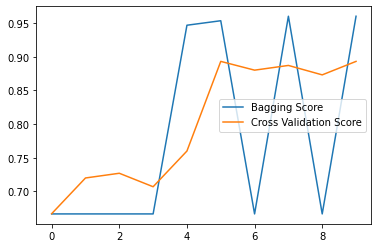

In [ ]:
plt.plot(bag_score, label='Bagging Score')
plt.plot(bag_val_score, label = 'Cross Validation Score')
plt.legend()
plt.show()